In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

In [7]:
df = pd.read_csv(r"D:\mars.txt")
# df = pd.read_csv(r"C:\Users\Алина\Downloads\Telegram Desktop\lab3\lab3\december.csv", sep = ";")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
df.head()

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server
0,AA0101,36227,0.0,0,PS,990301,0:14:46,0:15:01,15,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER
1,AA0101,36228,0.0,0,PS,990301,7:19:13,7:19:23,10,0:00:00,0:00:00,0,AGENT,7:19:22,7:19:29,7,NO_SERVER
2,AA0101,36229,0.0,0,NW,990301,7:40:24,7:40:37,13,0:00:00,0:00:00,0,AGENT,7:40:36,7:41:01,25,MIKI
3,AA0101,36230,0.0,0,PS,990301,7:54:44,7:54:54,10,0:00:00,0:00:00,0,AGENT,7:54:53,7:57:41,168,TOVA
4,AA0101,36231,0.0,0,PS,990301,8:09:10,8:09:19,9,0:00:00,0:00:00,0,AGENT,8:09:18,8:09:23,5,NO_SERVER


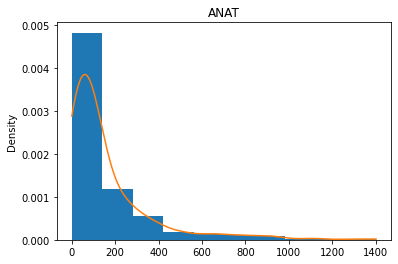

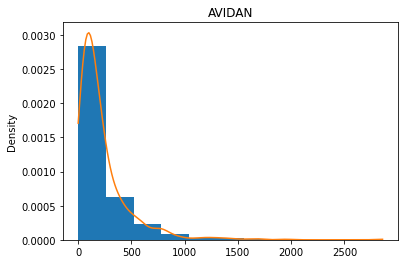

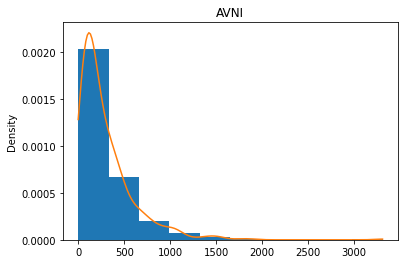

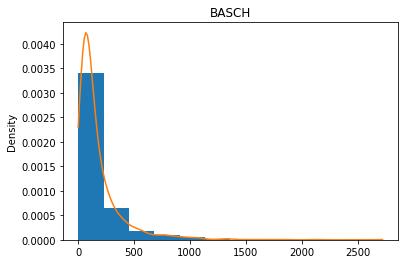

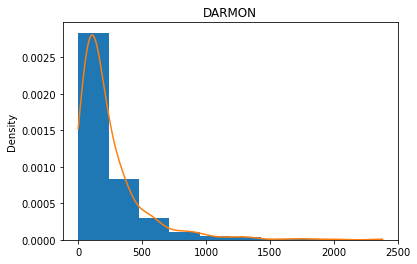

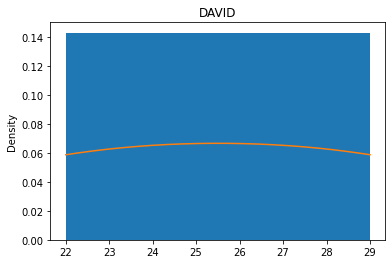

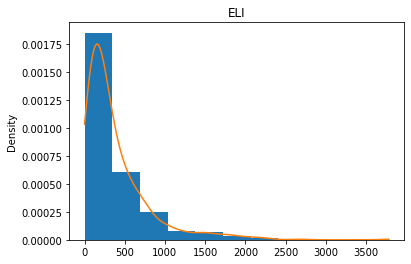

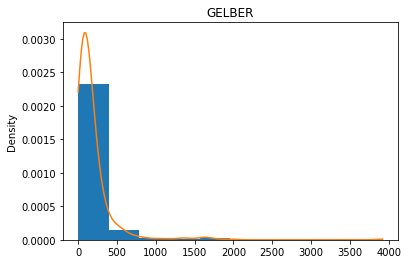

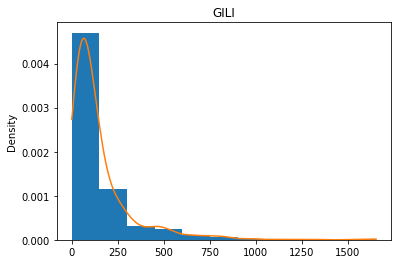

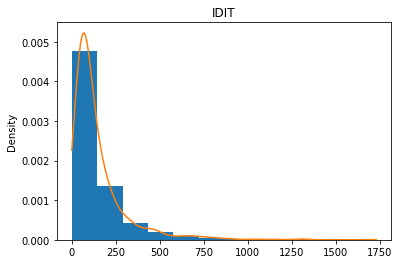

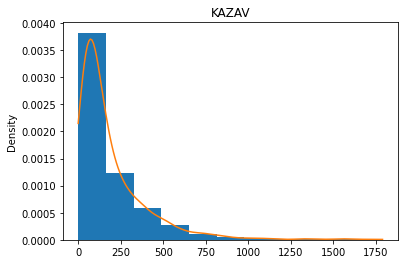

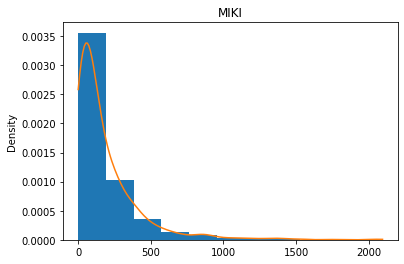

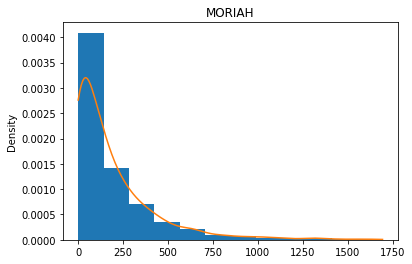

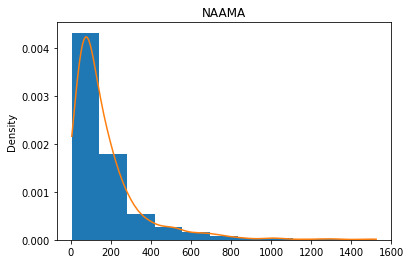

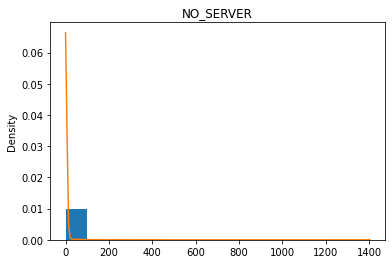

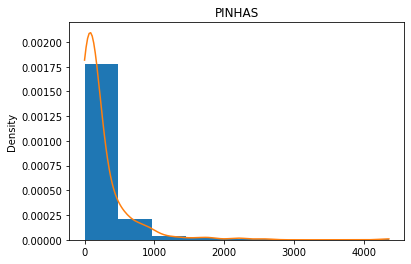

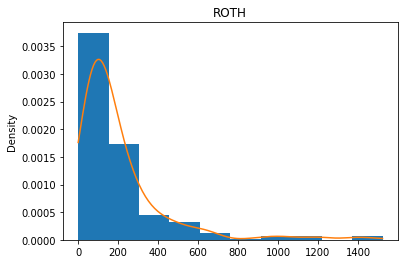

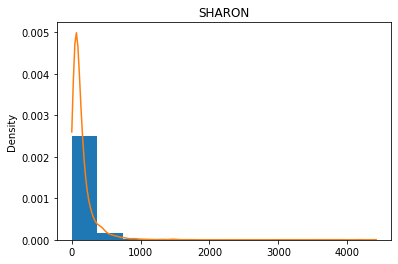

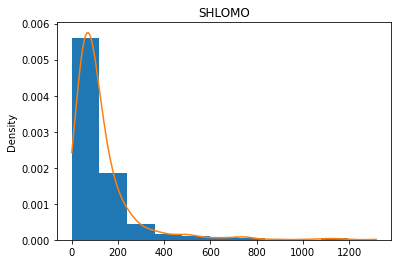

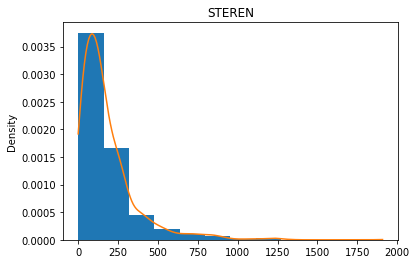

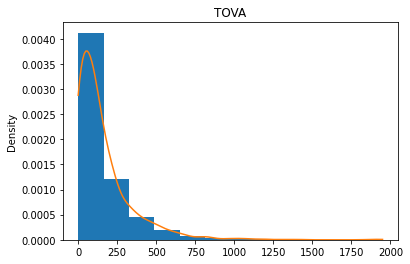

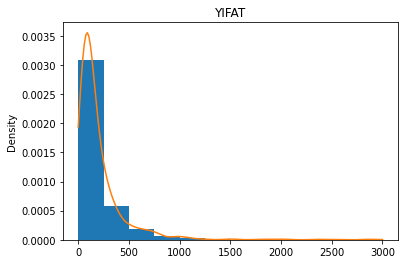

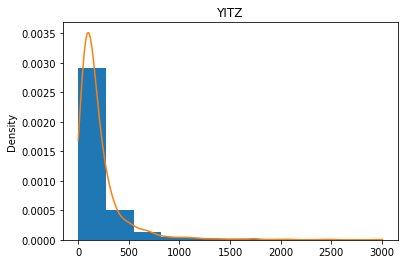

In [46]:
groups = list(df.groupby('server'))
groups_count = len(groups)
def bins(x):
    return int(round(1 + 1.44 * np.log(len(x))))
for i in range(groups_count-1):
    groups[i][1]['ser_time'].plot.hist(bins = bins(groups[i][1]['ser_time']),density=True)
    groups[i][1]['ser_time'].plot.kde(ind=np.linspace(min(groups[i][1]['ser_time']), max(groups[i][1]['ser_time']), num=200))
    plt.title(groups[i][0])
    plt.show()

Assumptions about the possible distributions:
1. Weibull distribution
2. Pareto distribution
3. Rayleigh distribution
4. Log-normal distribution

In [47]:
dists = []
params = []
servers = []
thBestDist = []
i = 0
while i < len(groups):
    servers.append(groups[i][0])
    i = i + 1
distribution_names = ['expon', 'exponweib', 'pareto', 'rayleigh', 'lognorm', 'genextreme', 'laplace', 'norm', 'exponnorm']
for group in groups:
    data = group[1]['ser_time']
    row = []   
    for dist_name in distribution_names:
        dist = getattr(stats, dist_name)
        param = dist.fit(data)
        _, p = stats.kstest(data, dist_name, args=param)
        row.append((dist_name, p, param))
    params.append([x[2] for x in row])
    dists.append([x[1] for x in row])
maxi = []
o = 0
parameters = []
for d in dists:
    dis = ''
    index = d.index(max(d))
    if index == 0:
        dis = 'expon'
    elif index == 1:
        dis = 'exponweib'
    elif index == 2:
        dis = 'paretto'
    elif index == 3:
        dis = 'rayleigh'
    elif index == 4:
        dis = 'lognorm'
    elif index == 5:
        dis = 'genextreme'
    elif index == 6:
        dis = 'laplace'
    elif index == 7:
        dis = 'norm'
    elif index == 8:
        dis = 'exponnorm'
    dis2 = getattr(stats, dis)
    maxi.append((dis, round(max(d),3), [round(p,1) for p in params[o][index]], dis2))
    o = o + 1
pd.DataFrame(dists, index=servers, columns=distribution_names).round(5)

C:\Users\alyti\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2640: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu


,expon,exponweib,pareto,rayleigh,lognorm,genextreme,laplace,norm,exponnorm
ANAT,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
AVIDAN,0.00039,0.85405,0.0,0.00000,0.00000,0.47125,0.00000,0.00000,0.00237
AVNI,0.03090,0.66109,0.0,0.00000,0.00000,0.08638,0.00000,0.00000,0.37945
BASCH,0.00000,0.56146,0.0,0.00000,0.00000,0.34388,0.00000,0.00000,0.00000
DARMON,0.00089,0.79811,0.0,0.00000,0.00000,0.78255,0.00000,0.00000,0.00504
DAVID,0.50000,0.50382,0.5,0.87577,0.50000,0.50018,0.96509,0.93325,0.93325
ELI,0.05857,0.93724,0.0,0.00000,0.00000,0.31647,0.00000,0.00000,0.04284
GELBER,0.00003,0.00028,0.0,0.00000,0.19037,0.48750,0.00000,0.00000,0.00003
GILI,0.00000,0.00000,0.0,0.00000,0.00000,0.00526,0.00000,0.00000,0.00000
IDIT,0.00000,0.03768,0.0,0.00000,0.00000,0.28598,0.00000,0.00000,0.00000


In [48]:
r = 0
for i in servers:
    print(i, maxi[r][:3])
    r = r + 1

ANAT ('exponnorm', 0.0, [1579.0, -0.2, 0.1])
AVIDAN ('exponweib', 0.854, [14.3, 0.4, -9.8, 9.4])
AVNI ('exponweib', 0.661, [3.0, 0.6, -2.8, 100.0])
BASCH ('exponweib', 0.561, [46.5, 0.3, -7.8, 0.9])
DARMON ('exponweib', 0.798, [19.2, 0.4, -13.7, 7.5])
DAVID ('laplace', 0.965, [25.5, 3.5])
ELI ('exponweib', 0.937, [3.1, 0.6, -2.7, 114.0])
GELBER ('genextreme', 0.487, [-0.5, 70.9, 69.9])
GILI ('genextreme', 0.005, [-0.5, 63.4, 64.5])
IDIT ('genextreme', 0.286, [-0.4, 71.1, 61.3])
KAZAV ('exponweib', 0.148, [3.6, 0.6, -1.4, 44.3])
MIKI ('genextreme', 0.0, [-0.7, 63.6, 78.3])
MORIAH ('exponweib', 0.0, [0.5, 1.2, -0.0, 330.1])
NAAMA ('exponweib', 0.393, [29.8, 0.4, -12.2, 3.4])
NO_SERVER ('expon', 0.0, [0.0, 3.5])
PINHAS ('exponweib', 0.035, [1.4, 0.6, -0.0, 109.2])
ROTH ('genextreme', 0.963, [-0.4, 97.9, 83.8])
SHARON ('genextreme', 0.386, [-0.5, 65.8, 56.2])
SHLOMO ('genextreme', 0.282, [-0.4, 65.7, 53.2])
STEREN ('genextreme', 0.019, [-0.4, 92.1, 84.2])
TOVA ('exponweib', 0.0, [0.6, 1.2,

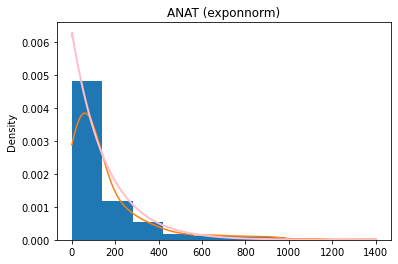

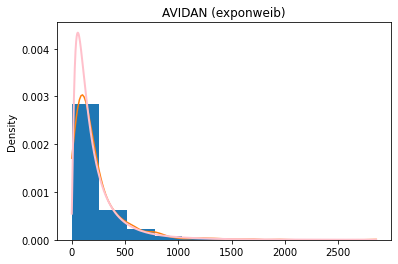

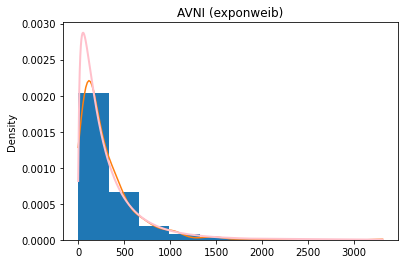

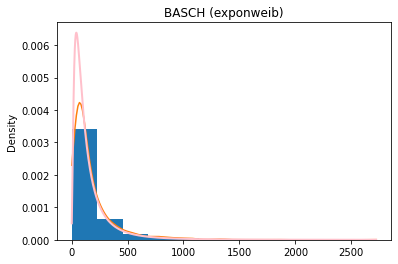

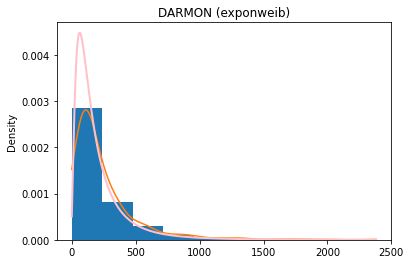

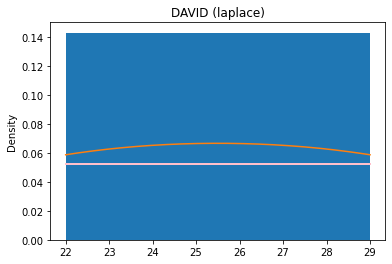

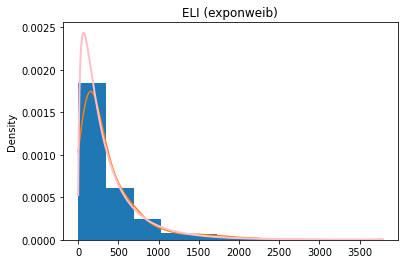

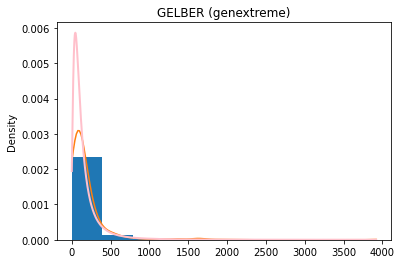

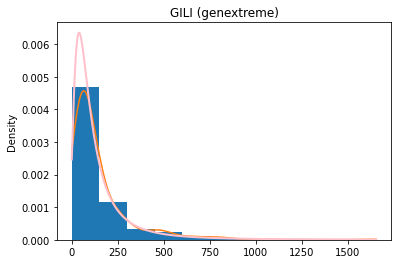

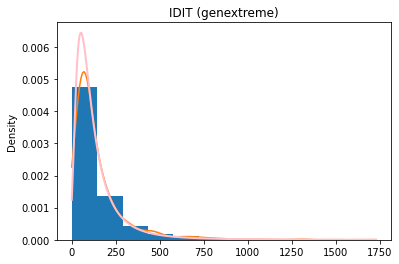

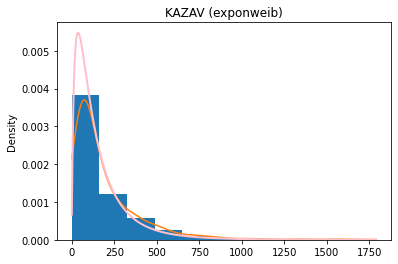

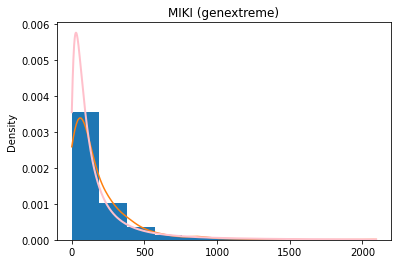

C:\Users\alyti\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:1734: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +


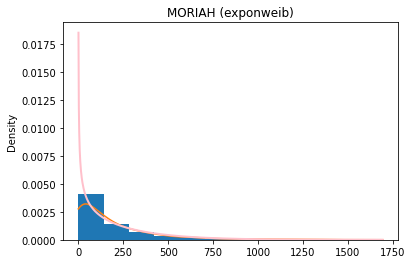

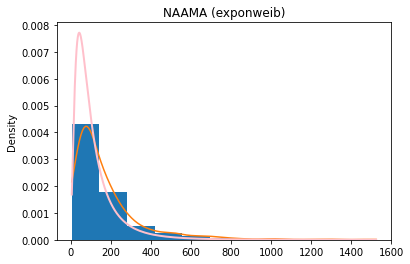

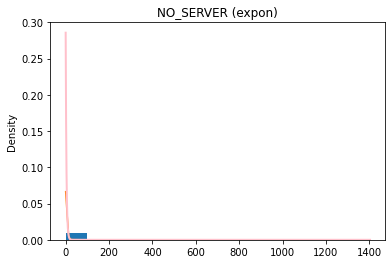

C:\Users\alyti\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:1734: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +


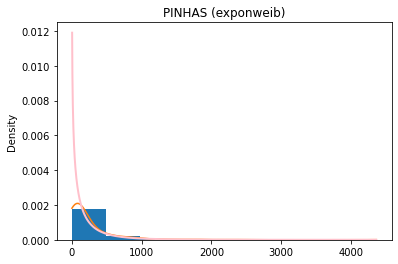

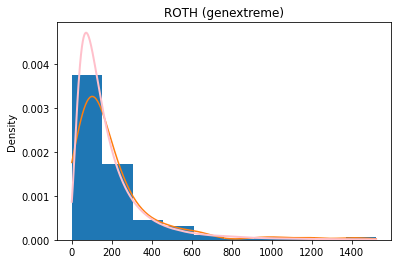

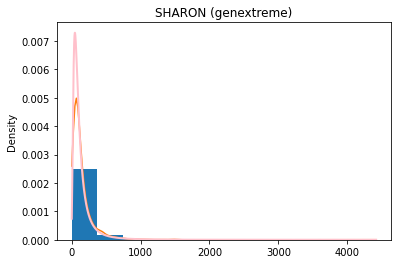

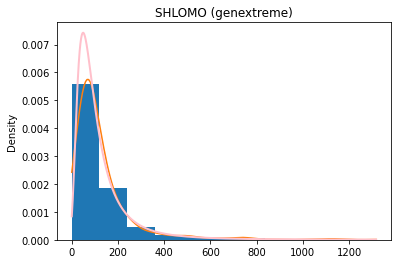

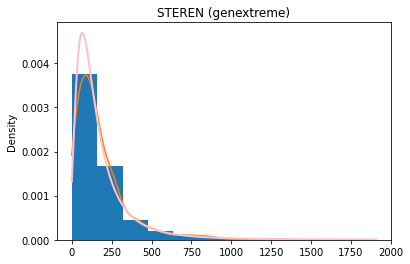

C:\Users\alyti\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:1734: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +


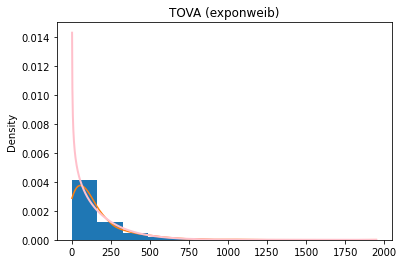

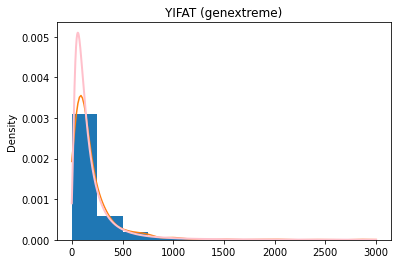

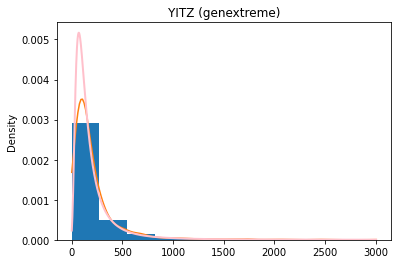

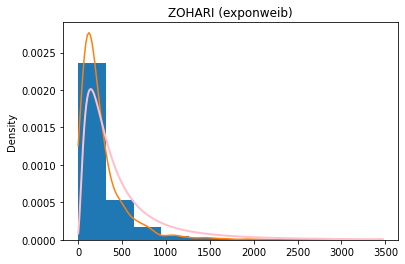

In [49]:
for i in range(groups_count):
    data = groups[i][1]['ser_time'].sort_values()
    data.plot.hist(bins=bins(data),density=True)
    data.plot.kde(ind=np.linspace(min(data), max(data), num=200))
    x = maxi[i][3](*maxi[i][2])
    plt.plot(data, x.pdf(data), 'pink', lw=2)
    plt.title(servers[i] + ' (' + maxi[i][0] + ')')
    plt.show()

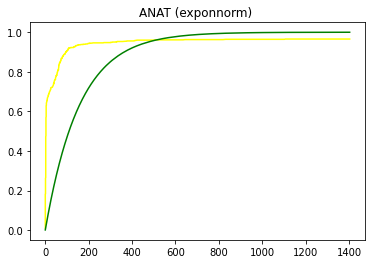

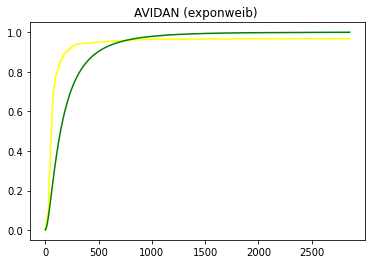

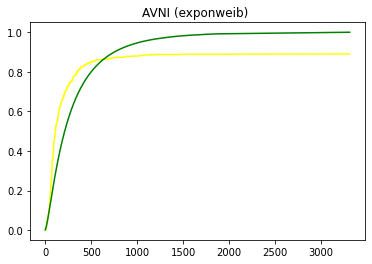

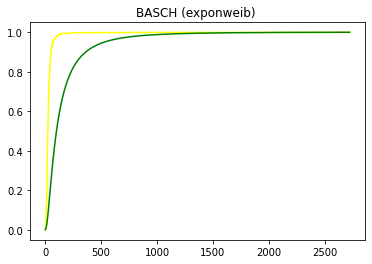

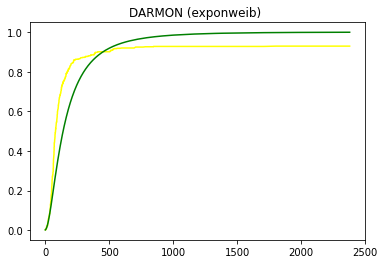

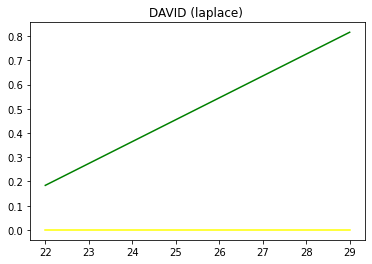

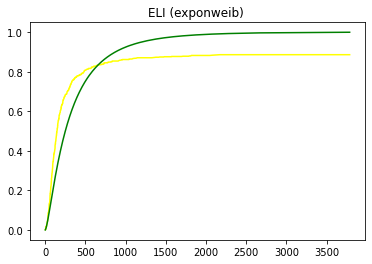

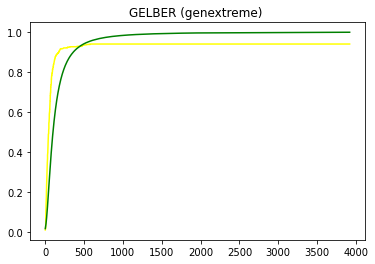

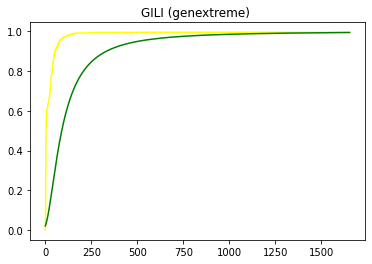

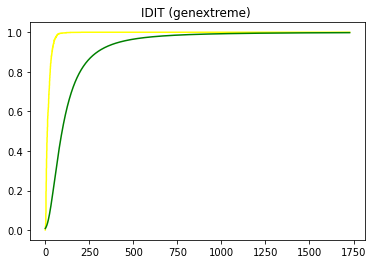

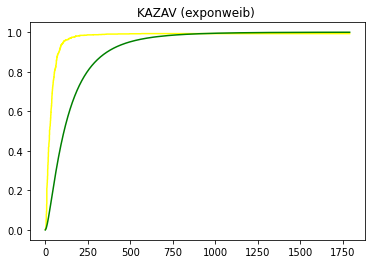

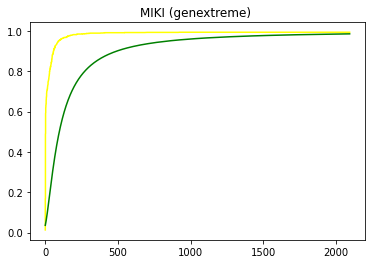

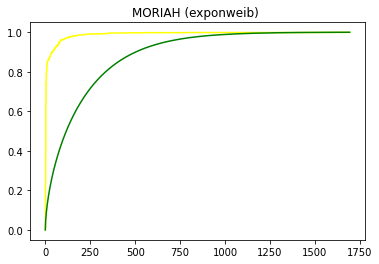

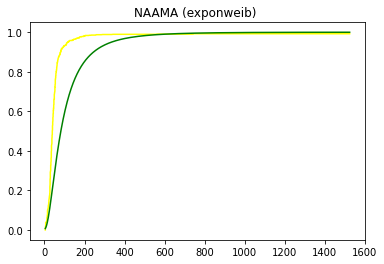

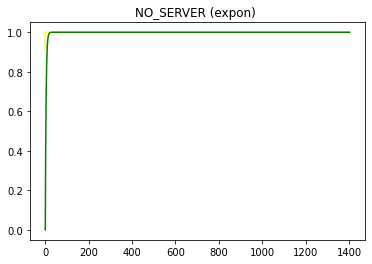

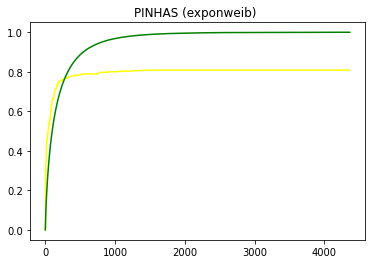

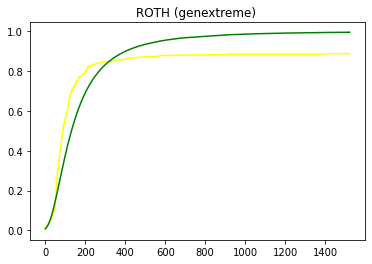

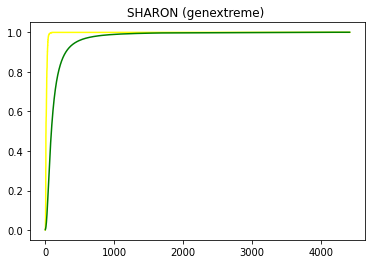

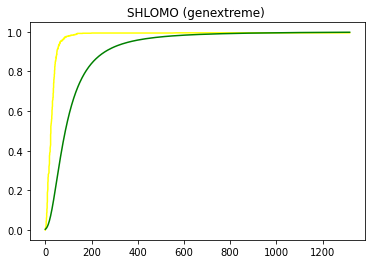

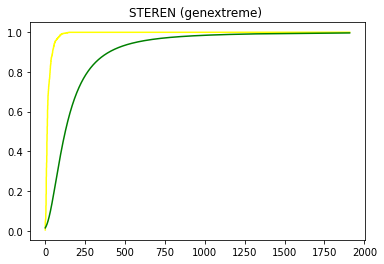

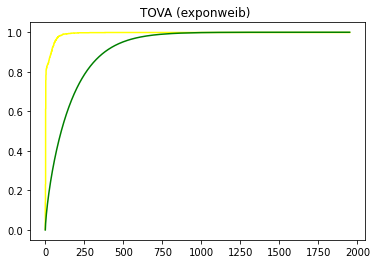

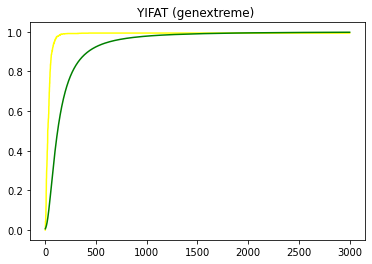

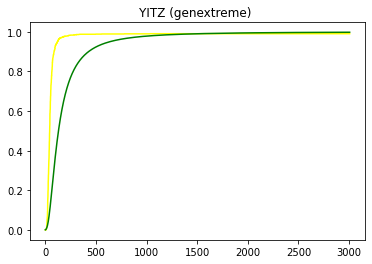

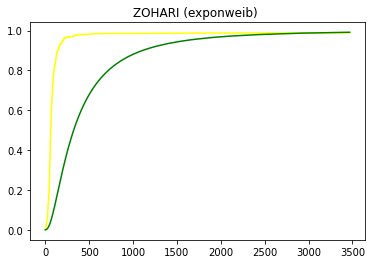

In [50]:
for i in range(groups_count):
    data = groups[i][1]['ser_time'].sort_values()
    emperical = ECDF(data)
    plt.plot(data, [emperical(i) for i in range(len(data))], 'yellow',label='emperical')
    x = maxi[i][3](*maxi[i][2])
    plt.plot(data, x.cdf(data), 'green', label='theoretical')
    plt.title(servers[i] + ' (' + maxi[i][0] + ') ') 
    plt.show()

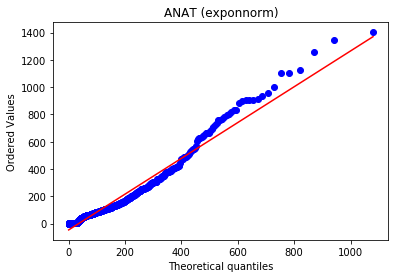

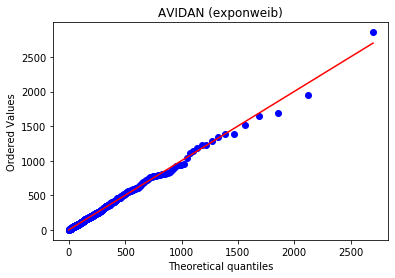

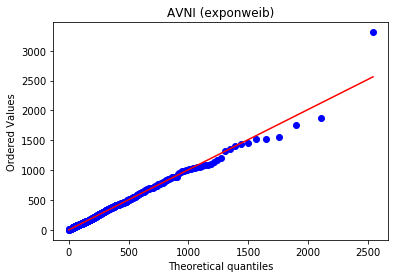

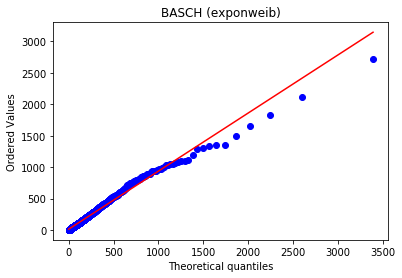

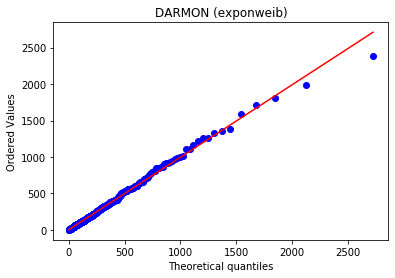

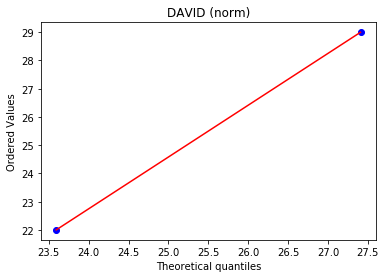

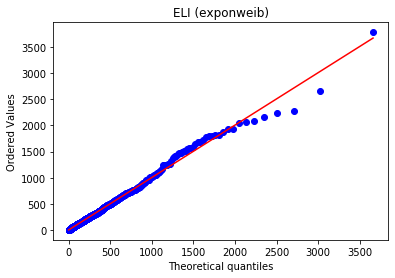

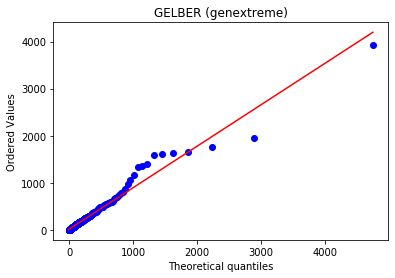

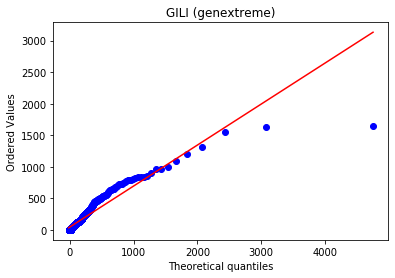

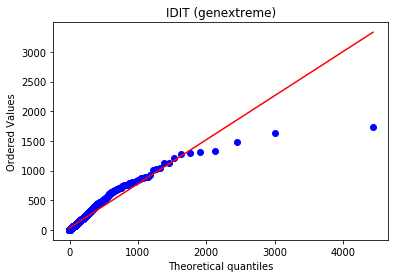

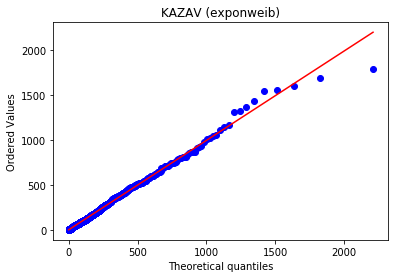

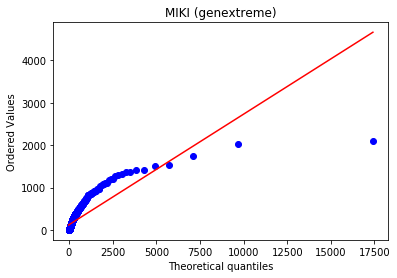

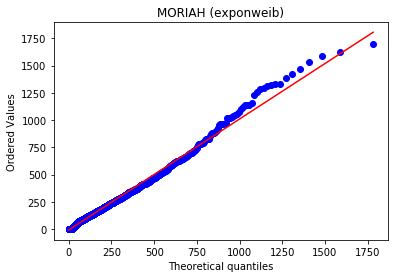

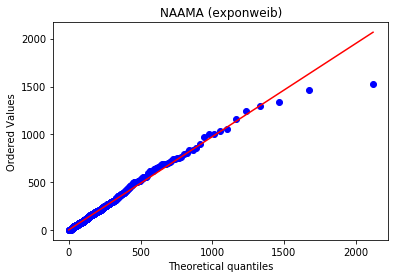

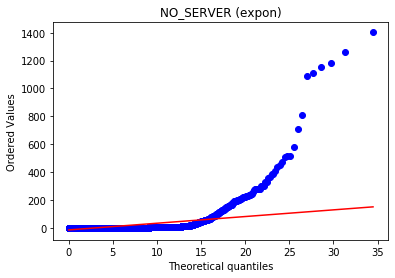

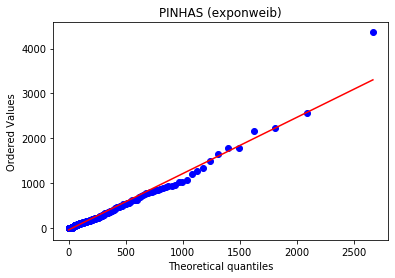

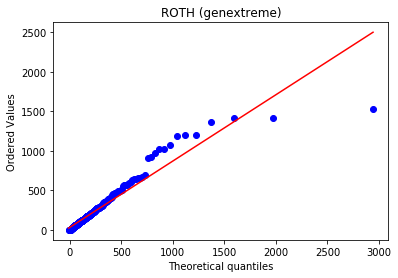

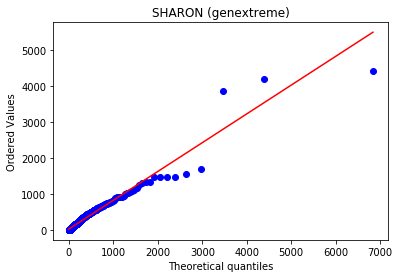

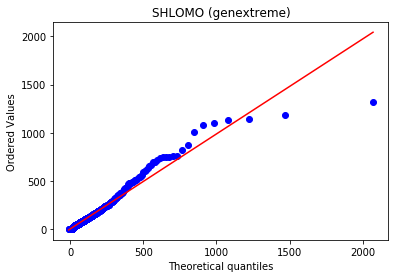

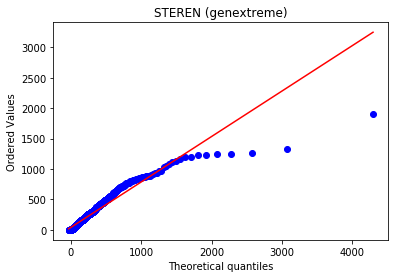

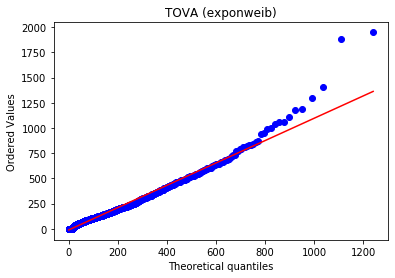

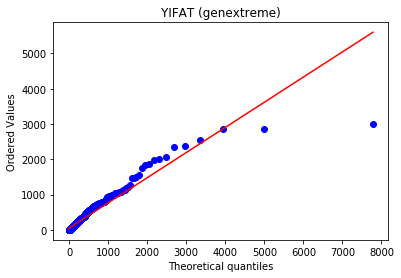

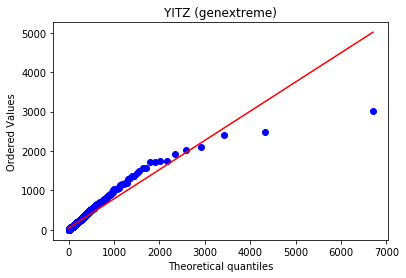

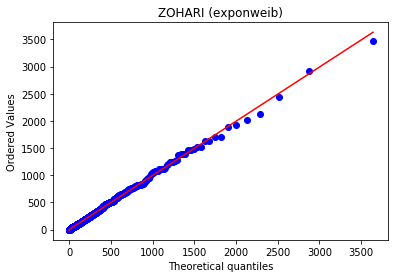

In [10]:
for i in range(groups_count):
    data = groups[i][1]['ser_time'].sort_values()
    stats.probplot(data, dist=maxi[i][3], sparams=maxi[i][2], plot = plt)
    plt.title(servers[i]+ ' (' + maxi[i][0] + ')')
    plt.show()

In [51]:
matrix = []  
for i in range(groups_count):
    sp = []
    sp.append(servers[i])
    newData = groups[i][1]['ser_time'].sort_values()
    row = [None] * groups_count
    for j in range(0, groups_count):
        newNewData = groups[j][1]['ser_time'].sort_values()
        row[j] = round(stats.ks_2samp(newData, newNewData)[1], 3)
        if row[j]!=None:
            if row[j]>0.05:
                if servers[i]!=servers[j]:
                    sp.append(servers[j])
    matrix.append(row)   
    print(sp)
pd.DataFrame(matrix, index=[x[0] for x in groups], columns=[x[0] for x in groups])


['ANAT', 'DAVID']
['AVIDAN', 'DARMON', 'ROTH']
['AVNI']
['BASCH', 'NAAMA']
['DARMON', 'AVIDAN']
['DAVID', 'ANAT', 'MIKI', 'MORIAH', 'PINHAS', 'TOVA']
['ELI']
['GELBER', 'IDIT']
['GILI']
['IDIT', 'GELBER']
['KAZAV']
['MIKI', 'DAVID']
['MORIAH', 'DAVID']
['NAAMA', 'BASCH', 'YIFAT']
['NO_SERVER']
['PINHAS', 'DAVID']
['ROTH', 'AVIDAN', 'STEREN', 'YIFAT', 'YITZ']
['SHARON']
['SHLOMO']
['STEREN', 'ROTH']
['TOVA', 'DAVID']
['YIFAT', 'NAAMA', 'ROTH']
['YITZ', 'ROTH']
['ZOHARI']


,ANAT,AVIDAN,AVNI,BASCH,DARMON,DAVID,ELI,GELBER,GILI,IDIT,KAZAV,MIKI,MORIAH,NAAMA,NO_SERVER,PINHAS,ROTH,SHARON,SHLOMO,STEREN,TOVA,YIFAT,YITZ,ZOHARI
ANAT,1.000,0.000,0.000,0.000,0.000,0.106,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.015,0.000,0.000,0.000
AVIDAN,0.000,1.000,0.000,0.000,0.128,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.338,0.000,0.000,0.002,0.000,0.000,0.036,0.000
AVNI,0.000,0.000,1.000,0.000,0.000,0.006,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003
BASCH,0.000,0.000,0.000,1.000,0.000,0.016,0.000,0.032,0.000,0.001,0.012,0.000,0.000,0.101,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
DARMON,0.000,0.128,0.000,0.000,1.000,0.007,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.036,0.000,0.000,0.000,0.000,0.000,0.002,0.028
DAVID,0.106,0.006,0.006,0.016,0.007,1.000,0.004,0.049,0.041,0.022,0.021,0.087,0.151,0.009,0.001,0.143,0.010,0.021,0.021,0.026,0.093,0.012,0.006,0.003
ELI,0.000,0.000,0.003,0.000,0.000,0.004,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
GELBER,0.000,0.000,0.000,0.032,0.000,0.049,0.000,1.000,0.037,0.083,0.019,0.000,0.000,0.008,0.000,0.001,0.002,0.009,0.000,0.000,0.000,0.009,0.000,0.000
GILI,0.000,0.000,0.000,0.000,0.000,0.041,0.000,0.037,1.000,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.008,0.000,0.000,0.000,0.000,0.000
IDIT,0.000,0.000,0.000,0.001,0.000,0.022,0.000,0.083,0.004,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.001,0.000,0.000,0.000,0.000,0.000
